In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

Uploading Dataset

In [3]:
data = pd.read_csv('/content/Fraud_check (1).csv',encoding='latin1')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


EDA

In [4]:
data.shape

(600, 6)

In [5]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
df = data.copy()
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
df.insert(6,'tax_class'," ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

<ipython-input-9-967b6d862d3d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Good'
<ipython-input-9-967b6d862d3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Risky'


In [10]:
df.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [11]:
df.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [12]:
df.drop(['Taxable.Income'], axis=1, inplace=True)
df.head(20)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
5,NO,Divorced,116382,0,NO,Good
6,NO,Divorced,80890,8,YES,Good
7,YES,Single,131253,3,YES,Good
8,NO,Single,102481,12,YES,Good
9,YES,Divorced,155482,4,YES,Good


In [13]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['tax_class']= label_encoder.fit_transform(df['tax_class'])

In [14]:
df.head(20)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
5,0,0,116382,0,0,0
6,0,0,80890,8,1,0
7,1,2,131253,3,1,0
8,0,2,102481,12,1,0
9,1,0,155482,4,1,0


In [15]:
df1=StandardScaler().fit_transform(df.iloc[:,2:4])

In [16]:
df1

array([[-1.17852072, -0.62914254],
       [ 0.50850002,  0.27636996],
       [ 1.03310911,  1.63463872],
       ...,
       [ 0.90969648, -1.76103318],
       [ 1.43219749,  0.1631809 ],
       [ 0.9915901 ,  0.04999184]])

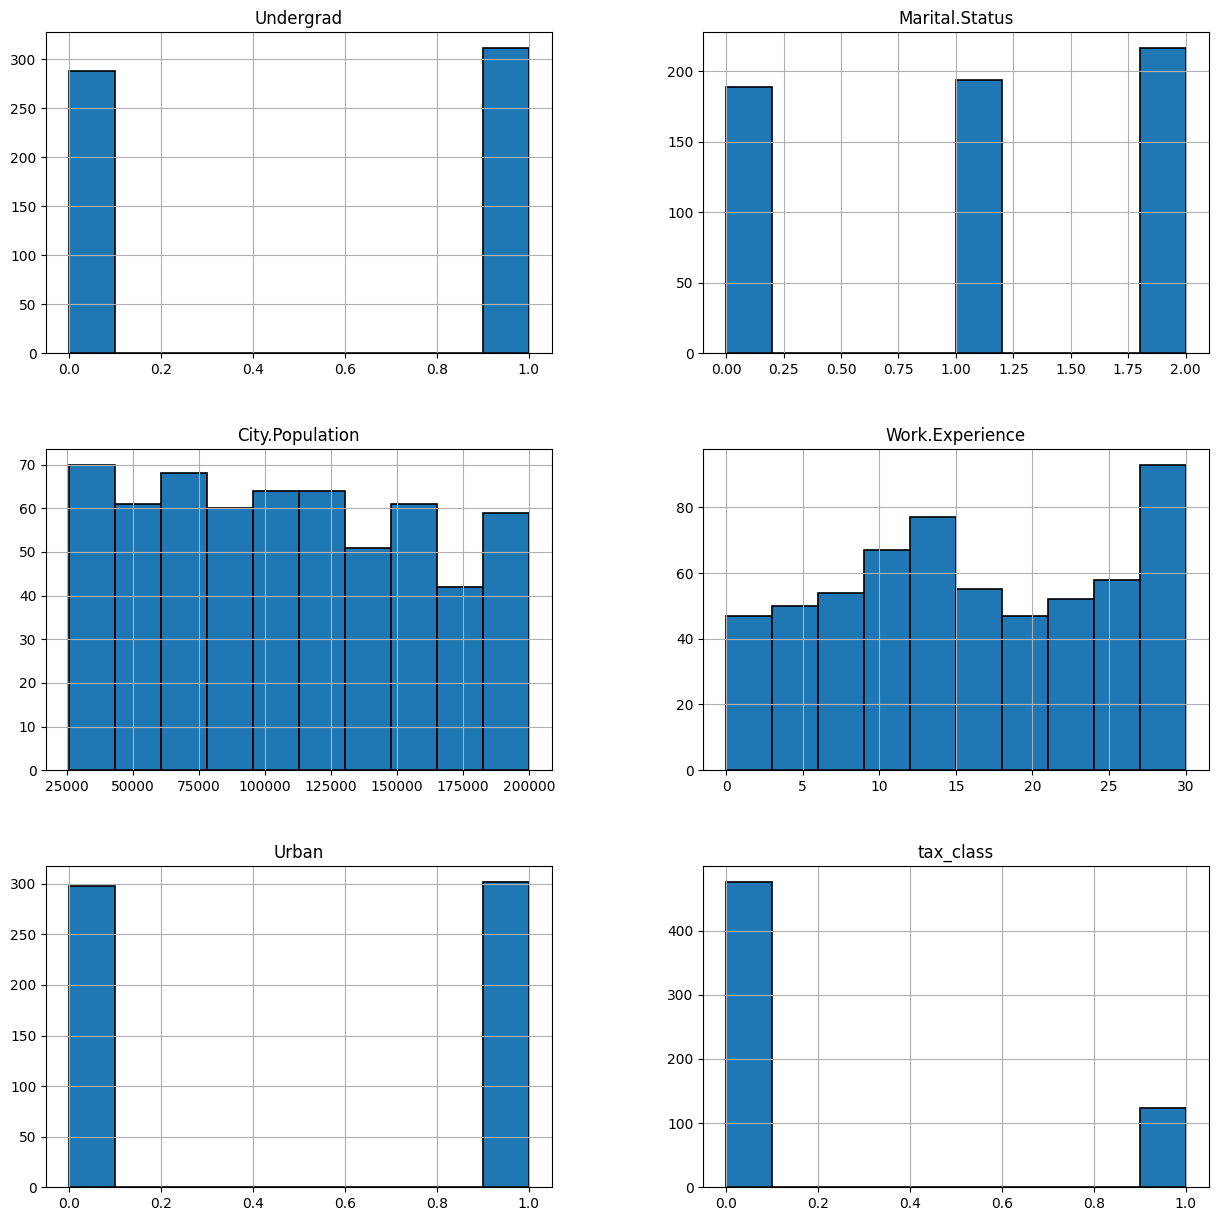

In [17]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(15,15));

In [18]:
data1 = df.copy()
data1.head(10)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
5,0,0,116382,0,0,0
6,0,0,80890,8,1,0
7,1,2,131253,3,1,0
8,0,2,102481,12,1,0
9,1,0,155482,4,1,0


In [19]:
x = data1.iloc[:,0:-1]
y = data1['tax_class']

Model Building

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [22]:
model = RFC()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(np.mean(y_test == pred))

0.75


Grid Search Optimisation

In [23]:
model = RFC(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model.fit(x,y)
pred = model.predict(x)
print(np.mean(y == pred))

0.7933333333333333


In [24]:
model = RFC(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model.fit(x_train,y_train)
pred = model.predict(x_train)
print(np.mean(y_train == pred))

0.7979166666666667


In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.7933333333333332


Bagging

In [27]:
model1 = RFC(n_estimators=500, criterion='entropy', max_leaf_nodes=19, max_depth=19)
from sklearn.ensemble import BaggingClassifier
estimator = BaggingClassifier(estimator = model1)
results = cross_val_score(estimator, x, y, cv = kfold)
print(results.mean())

0.7933333333333332


Boosting

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
estimator = AdaBoostClassifier(estimator=model)
results = cross_val_score(estimator,x,y,cv=kfold)
print(results.mean())

0.7566666666666666


Voting Classifier

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [31]:
estimators=[]

model2 = LogisticRegression(max_iter = 500,solver = 'liblinear')
estimators.append(('logistic',model2))

model3 = DecisionTreeClassifier()
estimators.append(('cart',model3))

model4 = SVC()
estimators.append(('svm',model4))

model5 = AdaBoostClassifier(estimator = model1)
estimators.append(('adaboost',model5))

model6 = BaggingClassifier(estimator = model1)
estimators.append(('bagging',model6))

model7 = RFC(n_estimators=500,criterion = 'entropy',max_leaf_nodes = 19,max_depth = 19)
estimators.append(('RandomForest',model7))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble,x,y,cv = kfold)

print(results)

[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]


In [32]:
print(results.mean())

0.7933333333333332


XGBM Boost

In [33]:
from tqdm.notebook import tqdm, trange
import time
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

In [35]:
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [36]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.83%


In [37]:
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [38]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_moons
import lightgbm as lgb

In [39]:
d_train = lgb.Dataset(x_train, label=y_train)

In [40]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [ ]:
clf = lgb.train(params, d_train, 100)

In [42]:
y_pred = clf.predict(x_test)

In [43]:
predictions = [round(value) for value in y_pred]

In [44]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7833333333333333